# PROJECT TITLE: FLOWER CLASSIFICATION

# Objectives:
* Classify images into five types of flowers — Daisy, Dandelion, Rose, Sunflower, and Tulip.
* Dataset: Kaggle


# 1. Import Libraries

In [1]:
%pip install tensorflow

import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras_tuner as kt

from PIL import Image

Note: you may need to restart the kernel to use updated packages.


# 2. Load and Preprocess Data

## 2.1 Load the Flowers Recognition Dataset

In [2]:
data_dir = r"D:\Programming\Project\Python for Deep Learning\Flower Recognition\flowers"

## 2.2 Clean dataset: remove files that are not valid images

In [3]:
for root, dirs, files in os.walk(data_dir):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            with Image.open(file_path) as img:
                img.verify()  # Verify that it is, in fact, an image
        except Exception:
            print(f"Removing invalid image file: {file_path}")
            os.remove(file_path)

## 2.3 Creating Image Data Generators with Augmentation

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

## 2.4 Load Training Data

In [5]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 3462 images belonging to 5 classes.


## 2.5 Load Validation Data

In [6]:
val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 861 images belonging to 5 classes.


# 3. Building CNN model

In [7]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,997 (18.42 MB)

 Trainable params: 4,828,997 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

# 4. Compile the Model

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

# 5. Train the Model

In [10]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 32s 282ms/step - accuracy: 0.3630 - loss: 1.4577 - val_accuracy: 0.5041 - val_loss: 1.1611
Epoch 2/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 30s 273ms/step - accuracy: 0.5177 - loss: 1.1567 - val_accuracy: 0.5679 - val_loss: 1.0244
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 28s 260ms/step - accuracy: 0.5782 - loss: 1.0352 - val_accuracy: 0.6202 - val_loss: 0.9831
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 29s 268ms/step - accuracy: 0.6375 - loss: 0.9628 - val_accuracy: 0.6620 - val_loss: 0.8489
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 28s 259ms/step - accuracy: 0.6546 - loss: 0.8905 - val_accuracy: 0.6678 - val_loss: 0.8449
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 28s 257ms/step - accuracy: 0.6674 - loss: 0.8768 - val_accuracy: 0.6736 - val_loss: 0.8475
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 28s 252ms/step - accuracy: 0.6879 - loss: 0.8387 - val_accuracy: 0.7143 - val_loss: 0.7853
Epoch 8/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 29s 270ms/step - accuracy: 0.7168 - loss: 0

# 6. Visualize Training Results

## 6.1 Plot Accuracy

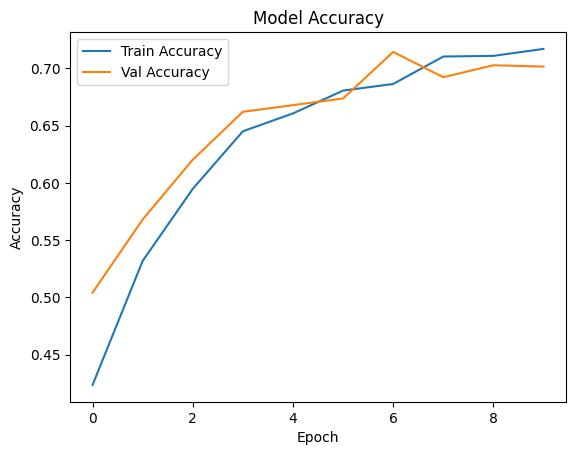

In [11]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 6.2 Plot Loss

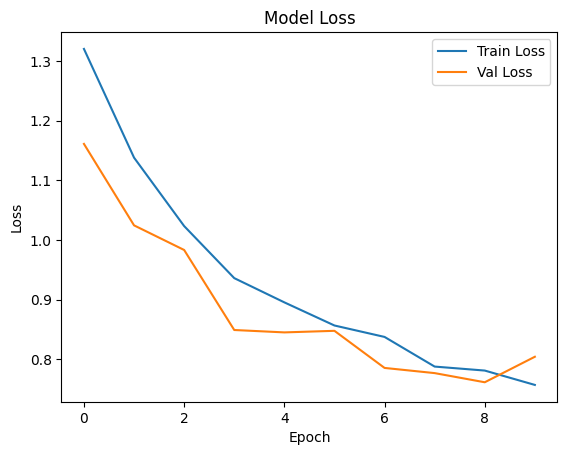

In [12]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 7. Save The Model

In [13]:
model.save('flower_recognition_model.h5')

# 8. Load the Model

In [14]:
from tensorflow.keras.models import load_model
model = load_model('flower_recognition_model.h5')

# 9. Make Predictions on New Images

## 9.1 Load and Predict new image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Predicted flower class: rose (73.41%)


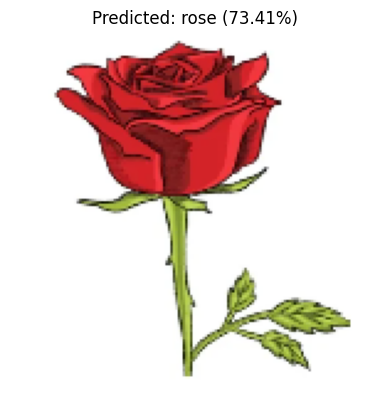

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted flower class: daisy (74.21%)


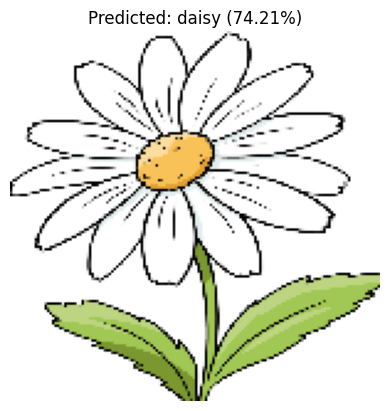

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted flower class: dandelion (98.34%)


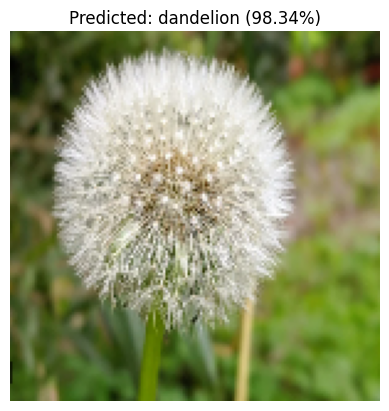

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted flower class: sunflower (97.70%)


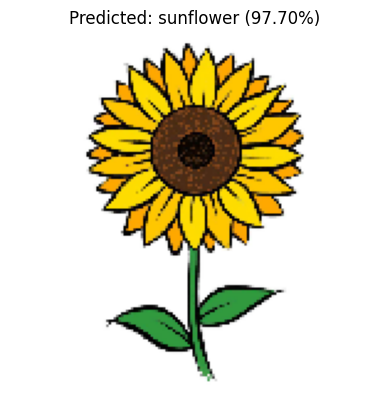

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Image not confidently associated with any class (Highest confidence: 49.77%)


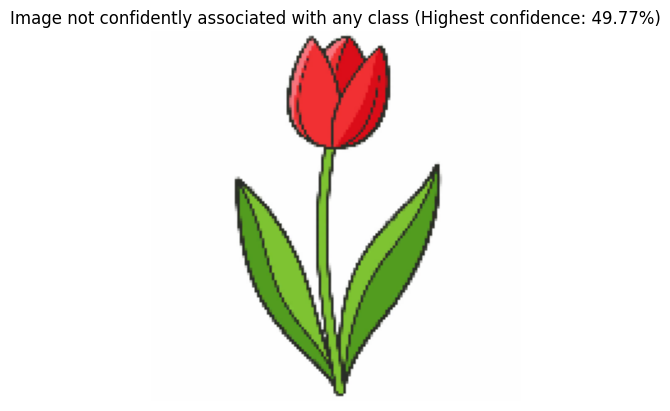

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Image not confidently associated with any class (Highest confidence: 47.91%)


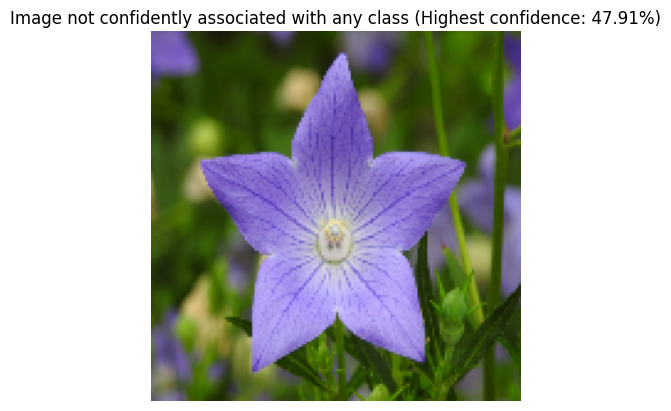

In [15]:
from tensorflow.keras.preprocessing import image

def predict_class(img_path, threshold=0.5):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    predictions = model.predict(img_array)
    max_prob = np.max(predictions)
    predicted_class = np.argmax(predictions)
    class_labels = list(train_generator.class_indices.keys())
    
    if max_prob >= threshold:
            print(f"Predicted flower class: {class_labels[predicted_class]} ({max_prob*100:.2f}%)")
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"Predicted: {class_labels[predicted_class]} ({max_prob*100:.2f}%)")
            plt.show()
    else:
        print(f"Image not confidently associated with any class (Highest confidence: {max_prob*100:.2f}%)")
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Image not confidently associated with any class (Highest confidence: {max_prob*100:.2f}%)")
        plt.show()

img_path_1 = r"D:\Programming\Project\Python for Deep Learning\Flower Recognition\Test_image.png"
img_path_2 = r"D:\Programming\Project\Python for Deep Learning\Flower Recognition\Test_image0.png"
img_path_3 = r"D:\Programming\Project\Python for Deep Learning\Flower Recognition\Test_image1.png"
img_path_4 = r"D:\Programming\Project\Python for Deep Learning\Flower Recognition\Test_image2.png"
img_path_5 = r"D:\Programming\Project\Python for Deep Learning\Flower Recognition\Test_image3.png"
img_path_6 = r"D:\Programming\Project\Python for Deep Learning\Flower Recognition\Test_image4.png"

predict_class(img_path_1)
predict_class(img_path_2)
predict_class(img_path_3)
predict_class(img_path_4)
predict_class(img_path_5)
predict_class(img_path_6)



# 10. Model Evaluation

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

## 10.1 Getting predictions on validation/test data

In [17]:
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step


## 10.2 Getting true labels

In [18]:
y_true = val_generator.classes

## 10.3 Compute confusion matrix

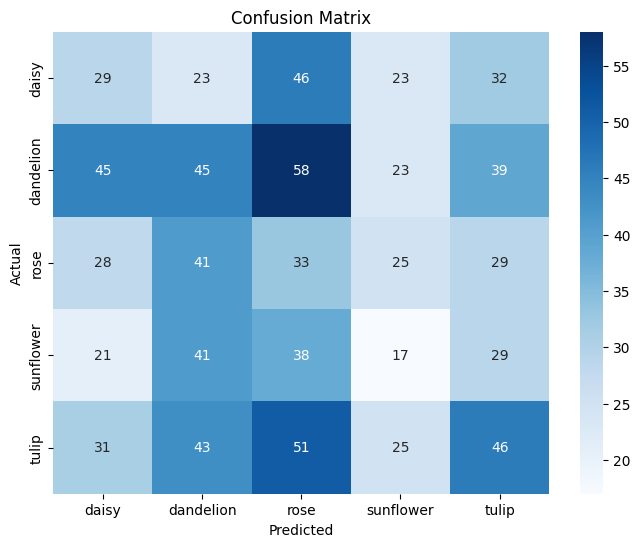

              precision    recall  f1-score   support

       daisy       0.19      0.19      0.19       153
   dandelion       0.23      0.21      0.22       210
        rose       0.15      0.21      0.17       156
   sunflower       0.15      0.12      0.13       146
       tulip       0.26      0.23      0.25       196

    accuracy                           0.20       861
   macro avg       0.20      0.19      0.19       861
weighted avg       0.20      0.20      0.20       861



In [19]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=val_generator.class_indices.keys(), yticklabels=val_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys()))